<a href="https://colab.research.google.com/github/Nireplag/jellyfish_classification/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# download data
! wget 'https://github.com/Nireplag/jellyfish_classification/raw/main/dataset.zip'

--2024-01-17 02:07:00--  https://github.com/Nireplag/jellyfish_classification/raw/main/dataset.zip
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Nireplag/jellyfish_classification/main/dataset.zip [following]
--2024-01-17 02:07:00--  https://raw.githubusercontent.com/Nireplag/jellyfish_classification/main/dataset.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14015822 (13M) [application/zip]
Saving to: ‘dataset.zip’

dataset.zip         100%[===================>]  13.37M  --.-KB/s    in 0.1s    

2024-01-17 02:07:00 (96.9 MB/s) - ‘dataset.zip’ saved [14015822/14015822]



In [2]:
import os
import zipfile
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow as tf

tf.random.set_seed(42)

In [3]:
# crete path to zip file
path = os.path.join(os.getcwd(), 'dataset.zip')

In [4]:
# unzip and delete zip file
with zipfile.ZipFile(path, 'r') as zip_ref:
    zip_ref.extractall(os.getcwd())

os.remove(path)

In [5]:
# create dataset path

dt_path = os.path.join(os.getcwd(), 'dataset')
train_path = os.path.join(dt_path, 'Train')
test_path = os.path.join(dt_path, 'test')
valid_path = os.path.join(dt_path, 'valid')

Validate dataset

In [6]:
# all paths have same folder structure

assert os.listdir(train_path) == os.listdir(test_path)
assert os.listdir(train_path) == os.listdir(valid_path)

# load list of directories

directories = os.listdir(train_path)

# EDA

In [7]:
# count number of images per class into dataset
total = 0
for dir in [train_path, test_path, valid_path]:
  print(dir)
  print('')
  for sp in directories:
    print(sp + ' : ' + str(len(os.listdir(os.path.join(dir, sp)))))
    total = total + len(os.listdir(os.path.join(dir, sp)))
  print('')
  print(dir + ' total : '+ str(total))
  print('')
  total = 0

/content/dataset/Train

lions_mane_jellyfish : 150
blue_jellyfish : 150
mauve_stinger_jellyfish : 150
Moon_jellyfish : 150
compass_jellyfish : 150
barrel_jellyfish : 150

/content/dataset/Train total : 900

/content/dataset/test

lions_mane_jellyfish : 8
blue_jellyfish : 7
mauve_stinger_jellyfish : 7
Moon_jellyfish : 6
compass_jellyfish : 7
barrel_jellyfish : 5

/content/dataset/test total : 40

/content/dataset/valid

lions_mane_jellyfish : 7
blue_jellyfish : 7
mauve_stinger_jellyfish : 7
Moon_jellyfish : 6
compass_jellyfish : 7
barrel_jellyfish : 5

/content/dataset/valid total : 39



We can see that the distribution of classes are equal into training data and quite similar into test and validation dataset, so we will not have issues with
oversampling.

In [8]:
# loop over images checking sizes
min_w = 0
min_h = 0
max_w = 0
max_h = 0
for dir in [train_path, test_path, valid_path]:
  print(dir)
  print('')
  for sp in directories:
   print(sp)
   print('')
   pt = os.path.join(dir, sp)
   for pic in os.listdir(pt):
    pt_pic = os.path.join(pt,pic)
    img = Image.open(pt_pic)
    width, height = img.size
    print(pic + ': width: ' + str(width) + ' height: ' + str(height))

    if (min_w == 0):
      min_w = width
    elif (min_w > width):
      min_w = width

    if (min_h == 0):
      min_h = height
    elif (min_h > height):
      min_h = height

    if (max_w == 0):
      max_w = width
    elif (max_w < width):
      max_w = width

    if (max_h == 0):
      max_h = height
    elif (max_h < height):
      max_h = height

/content/dataset/Train

lions_mane_jellyfish

07.jpg: width: 224 height: 224
aug-8-09.jpg: width: 224 height: 224
aug-67-07.jpg: width: 224 height: 224
aug-16-21.jpg: width: 179 height: 179
09.jpg: width: 224 height: 224
aug-66-06.jpg: width: 179 height: 179
aug-83-29.jpg: width: 224 height: 224
60.jpg: width: 224 height: 224
aug-60-77.jpg: width: 224 height: 224
aug-3-04.jpg: width: 179 height: 179
aug-4-05.jpg: width: 179 height: 179
aug-79-23.jpg: width: 224 height: 224
aug-86-32.jpg: width: 179 height: 179
aug-9-10.jpg: width: 224 height: 224
aug-63-03.jpg: width: 224 height: 224
31.jpg: width: 224 height: 224
50.jpg: width: 224 height: 224
03.jpg: width: 224 height: 224
aug-17-22.jpg: width: 224 height: 224
aug-52-69.jpg: width: 224 height: 224
aug-31-39.jpg: width: 224 height: 224
57.jpg: width: 224 height: 224
aug-21-26.JPG: width: 179 height: 179
75.jpeg: width: 224 height: 224
aug-26-34.jpg: width: 179 height: 179
aug-47-60.jpg: width: 179 height: 179
74.png: width: 224 height

In [9]:
# check sizes

print(f'Minimum width is {min_w} and minimun height is {min_h}')
print(f'Max width is {max_w} and max height is {max_h}')

Minimum width is 179 and minimun height is 179
Max width is 224 and max height is 224


Looking at the information from last two cells we can see that we have two sizes of images, (224, 224) and (179,179) therefore before feeding it to the model we will need to reshape them, and to avoid adding information we will reshape them to the smaller size.

/content/dataset/Train

lions_mane_jellyfish



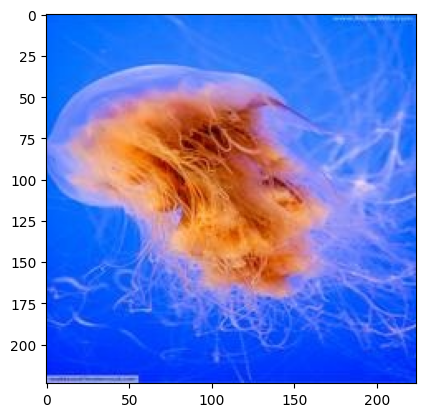


blue_jellyfish



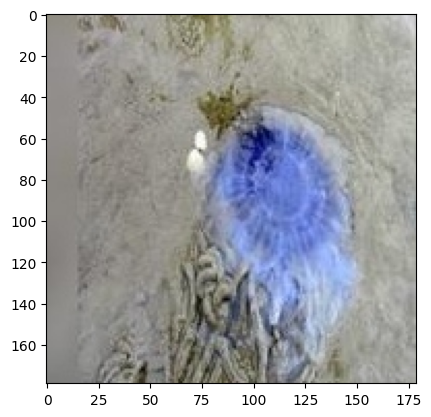


mauve_stinger_jellyfish



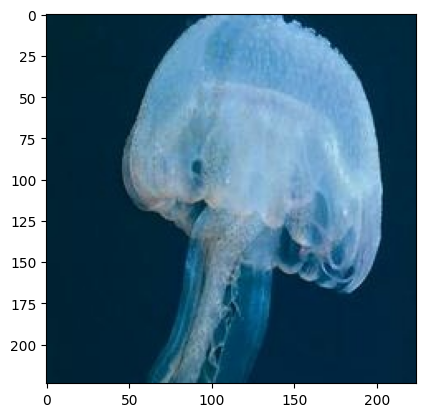


Moon_jellyfish



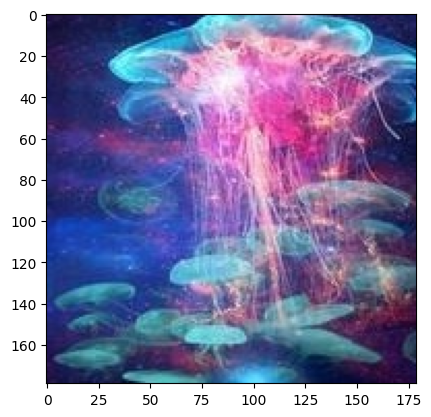


compass_jellyfish



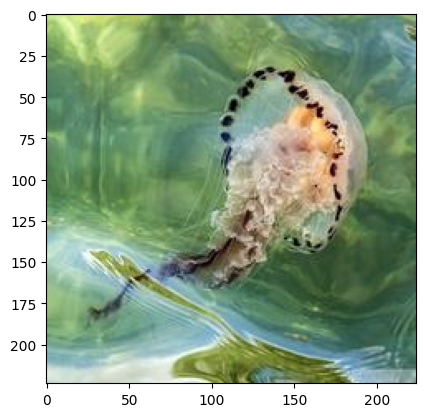


barrel_jellyfish



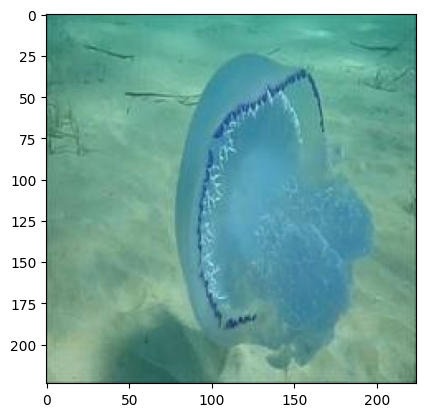

In [10]:
# looking at sample of images

for dir in [train_path]:
  print(dir)
  print('')
  for sp in directories:
   print(sp)
   print('')
   pt = os.path.join(dir, sp)
   pic = os.listdir(pt)[0]
   pt_pic = os.path.join(pt,pic)
   img = Image.open(pt_pic)
   plt.figure()
   plt.imshow(img)
   plt.show()
   print('')

# Model creation

In [6]:
# define ImageDataGenerators

train_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    horizontal_flip=True,
    vertical_flip=True,
    rescale=1/255.
)

train_ds = train_gen.flow_from_directory(
    train_path,
    target_size=(179, 179),
    batch_size=32
)

test_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255.
    )

test_ds = test_gen.flow_from_directory(
    test_path,
    target_size=(179, 179),
    batch_size=32
)

eval_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255.
    )

eval_ds = test_gen.flow_from_directory(
    valid_path,
    target_size=(179, 179),
    batch_size=32
)

Found 900 images belonging to 6 classes.
Found 40 images belonging to 6 classes.
Found 39 images belonging to 6 classes.


In [7]:
translation = train_ds.class_indices
print(translation)

{'Moon_jellyfish': 0, 'barrel_jellyfish': 1, 'blue_jellyfish': 2, 'compass_jellyfish': 3, 'lions_mane_jellyfish': 4, 'mauve_stinger_jellyfish': 5}


In [13]:
# define models as functions

def model1(filter, kernel_size, d1, d2, d3, lr, epoch):

  inputs = tf.keras.Input(shape=(179, 179, 3))
  conv1 = tf.keras.layers.Conv2D(filter, kernel_size)(inputs)
  vector1 = tf.keras.layers.GlobalAveragePooling2D()(conv1)
  flat = tf.keras.layers.Flatten()(vector1)
  dense1 = tf.keras.layers.Dense(d1, activation="relu")(flat)
  dense2 = tf.keras.layers.Dense(d2, activation="relu")(dense1)
  dense3 = tf.keras.layers.Dense(d3, activation="relu")(dense2)
  output = tf.keras.layers.Dense(6, activation="softmax")(dense3)

  model = tf.keras.Model(inputs, output)

  model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=lr),
                loss = "categorical_crossentropy",
                metrics = ["accuracy"])

  model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='/tmp/checkpoint',
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

  model.fit(
    train_ds,
    epochs=epoch,
    validation_data=test_ds,
    callbacks=[model_checkpoint_callback],
    verbose = 0)

  model.load_weights('/tmp/checkpoint')
  metric = model.evaluate(test_ds, verbose =0)
  print(filter, kernel_size, d1, d2, d3, lr, epoch, metric)



In [14]:
filters = [32, 64]
kernels = [(3,3)]
dense_1 = [128]
dense_2 = [32]
dense_3 = [16]
lrs = [0.1, 0.01]
epochs = [100, 50]

for filter in filters:
  for kernel in kernels:
    for d1 in dense_1:
      for d2 in dense_2:
        for d3 in dense_3:
          for lr in lrs:
            for epoch in epochs:
              model1(filter, kernel, d1, d2, d3, lr, epoch)


32 (3, 3) 128 32 16 0.1 100 [1.7981979846954346, 0.20000000298023224]
32 (3, 3) 128 32 16 0.1 50 [1.7917054891586304, 0.20000000298023224]
32 (3, 3) 128 32 16 0.01 100 [1.366329550743103, 0.574999988079071]
32 (3, 3) 128 32 16 0.01 50 [1.3480771780014038, 0.5]
64 (3, 3) 128 32 16 0.1 100 [1.7854783535003662, 0.20000000298023224]
64 (3, 3) 128 32 16 0.1 50 [1.7891645431518555, 0.20000000298023224]
64 (3, 3) 128 32 16 0.01 100 [1.4299933910369873, 0.5]
64 (3, 3) 128 32 16 0.01 50 [1.349928617477417, 0.5249999761581421]


In [13]:
# define models as functions

def model2(drop, lr, epoch):

  inputs = tf.keras.Input(shape=(179, 179, 3))
  conv1 = tf.keras.layers.Conv2D(32, (3,3))(inputs)
  vector2 = tf.keras.layers.GlobalAveragePooling2D()(conv1)
  flat = tf.keras.layers.Flatten()(vector2)
  dense1 = tf.keras.layers.Dense(128, activation="relu")(flat)
  x = tf.keras.layers.Dropout(drop)(dense1)
  dense2 = tf.keras.layers.Dense(32, activation="relu")(x)
  x2 = tf.keras.layers.Dropout(drop)(dense2)
  dense3 = tf.keras.layers.Dense(16, activation="relu")(x2)
  dense4 = tf.keras.layers.Dense(12, activation="relu")(dense3)
  output = tf.keras.layers.Dense(6, activation="softmax")(dense4)

  model = tf.keras.Model(inputs, output)

  model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=lr),
                loss = "categorical_crossentropy",
                metrics = ["accuracy"])

  model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='/tmp/checkpoint',
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

  model.fit(
    train_ds,
    epochs=epoch,
    validation_data=test_ds,
    callbacks=[model_checkpoint_callback],
    verbose = 0)

  model.load_weights('/tmp/checkpoint')
  metric = model.evaluate(test_ds, verbose =0)
  print(drop, lr, epoch, metric)



In [14]:
drops = [0.2, 0.3, 0.5]
lrs = [0.1, 0.01]
epochs = [100, 50]

for drop in drops:
  for lr in lrs:
    for epoch in epochs:
      model2(drop, lr, epoch)

0.2 0.1 100 [1.7939636707305908, 0.20000000298023224]
0.2 0.1 50 [1.7831007242202759, 0.20000000298023224]
0.2 0.01 100 [1.475119948387146, 0.5249999761581421]
0.2 0.01 50 [1.4454944133758545, 0.5249999761581421]
0.3 0.1 100 [1.800927758216858, 0.20000000298023224]
0.3 0.1 50 [1.7935823202133179, 0.20000000298023224]
0.3 0.01 100 [1.5079638957977295, 0.5249999761581421]
0.3 0.01 50 [1.4541103839874268, 0.4749999940395355]
0.5 0.1 100 [1.7989009618759155, 0.20000000298023224]
0.5 0.1 50 [1.7988046407699585, 0.20000000298023224]
0.5 0.01 100 [1.5727617740631104, 0.4000000059604645]
0.5 0.01 50 [1.5998306274414062, 0.4000000059604645]


In [23]:
base_model = tf.keras.applications.VGG16(
                      input_shape = (179, 179, 3),
                      include_top = False,
                      weights = "imagenet")

base_model.trainable = False

In [31]:
def model3(lr, epoch):

  flat = tf.keras.layers.Flatten()(base_model.output)
  output = tf.keras.layers.Dense(6, activation="softmax")(flat)

  model = tf.keras.Model(base_model.input, output)

  model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=lr),
                loss = "categorical_crossentropy",
                metrics = ["accuracy"])

  model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='/tmp/checkpoint',
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

  model.fit(
    train_ds,
    epochs=epoch,
    validation_data=test_ds,
    callbacks=[model_checkpoint_callback],
    verbose = 0)

  model.load_weights('/tmp/checkpoint')
  metric = model.evaluate(test_ds, verbose = 0)
  print(lr, epoch, metric)

In [33]:
lrs = [0.01, 0.001]
epochs = [1, 5]

for lr in lrs:
  for epoch in epochs:
    model3(lr, epoch)

0.01 1 [1.188855767250061, 0.800000011920929]
0.01 5 [0.8426905870437622, 0.8500000238418579]
0.001 1 [0.8070859909057617, 0.7250000238418579]
0.001 5 [0.502559244632721, 0.8999999761581421]
